In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.2 MB/s eta 0:00:00


In [32]:
import os
import cv2
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

model_name = 'openai/clip-vit-large-patch14'
processor = CLIPProcessor.from_pretrained (model_name)
model = CLIPModel.from_pretrained (model_name)

def ImageSearch (query, dataset):
  best_match = list ()
  text_input = processor (text=query, return_tensors="pt")
  directory = os.listdir (dataset)
  directory_length = len (directory)
  idx = 1

  with torch.no_grad ():
    text_features = model.get_text_features (**text_input)

  for image_path in directory:
    image = Image.open (os.path.join (dataset, image_path))
    image_input = processor (images=image, return_tensors="pt")

    with torch.no_grad ():
        image_features = model.get_image_features (**image_input)

    similarity_score = (text_features @ image_features.T).squeeze ()

    best_match.append ((os.path.join (dataset, image_path), similarity_score.item ()))
    print (idx / directory_length * 100)
    idx += 1

  return sorted (best_match, key=lambda o : o[1])[len (best_match) - 1][0]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [42]:
from matplotlib import pyplot as plt

best_image = ImageSearch ('rhino', 'dataset')

0.6711409395973155
1.342281879194631
2.013422818791946
2.684563758389262
3.3557046979865772
4.026845637583892
4.697986577181208
5.369127516778524
6.0402684563758395
6.7114093959731544
7.38255033557047
8.053691275167784
8.724832214765101
9.395973154362416
10.06711409395973
10.738255033557047
11.409395973154362
12.080536912751679
12.751677852348994
13.422818791946309
14.093959731543624
14.76510067114094
15.436241610738255
16.10738255033557
16.778523489932887
17.449664429530202
18.120805369127517
18.79194630872483
19.463087248322147
20.13422818791946
20.80536912751678
21.476510067114095
22.14765100671141
22.818791946308725
23.48993288590604
24.161073825503358
24.832214765100673
25.503355704697988
26.174496644295303
26.845637583892618
27.516778523489933
28.187919463087248
28.859060402684566
29.53020134228188
30.201342281879196
30.87248322147651
31.543624161073826
32.21476510067114
32.88590604026846
33.557046979865774
34.22818791946309
34.899328859060404
35.57046979865772
36.241610738255034

In [43]:
best_image

'dataset/54d8422657.jpg'

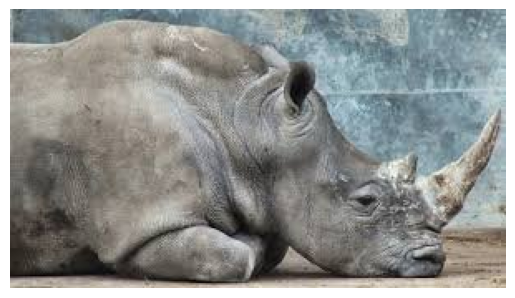

In [45]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread (best_image)
image_rgb = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)

plt.imshow (image_rgb)
plt.axis ('off')
plt.show ()